In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import preprocessing
sns.set(style = 'whitegrid')

In [39]:
x = np.array([[1, 50], [5, 20], [3, 80], [5, 60]])
y = np.array([0, 0, 1, 1])

In [40]:
classifier = SVC(kernel = 'linear', C = 100)
classifier.fit(x, y)

SVC(C=100, kernel='linear')

In [41]:
w = classifier.coef_[0]

In [42]:
w

array([0.06896552, 0.17241379])

In [43]:
b = classifier.intercept_

In [44]:
b

array([-9.68965517])

In [45]:
decision_boundary = np.zeros(len(x[:, 0]))
decision_boundary = (-w[0]/w[1]) * x[:, 0] - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
support_vector = classifier.support_vectors_

In [46]:
support_vector

array([[ 1., 50.],
       [ 5., 60.]])

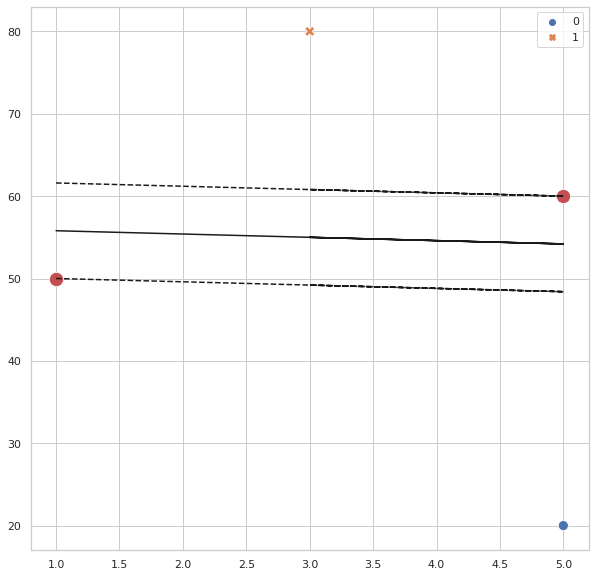

In [47]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x[:, 0], x[:, 1], hue = y, style = y, s = 100)
ax = sns.scatterplot(x = support_vector[:, 0], y = support_vector[:, 1], s = 200, color = 'r')
ax.plot(x[:, 0], decision_boundary, 'k-')
ax.plot(x[:, 0], gutter_up, 'k--')
ax.plot(x[:, 0], gutter_down, 'k--')

In [48]:
scaler = preprocessing.StandardScaler()

In [49]:
x_scaled = scaler.fit_transform(x)

In [50]:
classifier.fit(x_scaled, y)

SVC(C=100, kernel='linear')

In [51]:
w = classifier.coef_[0]

In [52]:
b = classifier.intercept_

In [53]:
decision_boundary = np.zeros(len(x_scaled[:, 0]))
decision_boundary = (-w[0]/w[1]) * x_scaled[:, 0] - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
support_vector = classifier.support_vectors_

In [54]:
support_vector

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [ 0.90453403,  0.34641016]])

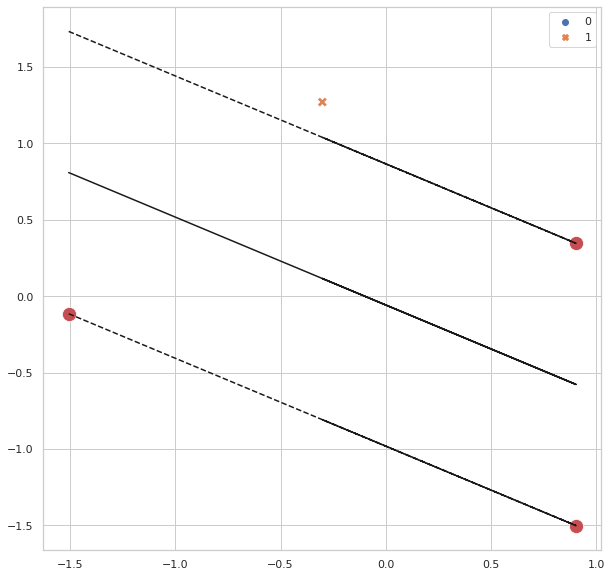

In [55]:
fig = plt.figure(figsize = (10,10))
ax = sns.scatterplot(x_scaled[:, 0], x_scaled[:, 1], hue = y, style = y, s = 100)
ax = sns.scatterplot(x = support_vector[:, 0], y = support_vector[:, 1], s = 200, color = 'r')
ax.plot(x_scaled[:, 0], decision_boundary, 'k-')
ax.plot(x_scaled[:, 0], gutter_up, 'k--')
ax.plot(x_scaled[:, 0], gutter_down, 'k--')